<div style="display: flex; justify-content: center; align-items: center; background-color: #644FBA; color: #FFFF; padding: 30px;">
<h1 style="margin: 0;">TP : Basis and Orthogonal Projection Matrix</h1>
</div>


<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h1 style="color: #644FBA; margin-top: 0;">Objective of This Notebook</h1>
  <p style="color: #1E173B;">
  Extract a basis from a set of spanning vectors..
  </p>
  <p style="color: #1E173B;">
 Compute the orthogonal projection matrix onto a subspace defined by the basis .
  </p>
</div>

<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Table of Contents</h2>
  <ul>
    <li><a href="#1" style="text-decoration: none; color: #644FBA;">Importing the libraries</a></li>
    <li><a href="#2" style="text-decoration: none; color: #644FBA;">Compute a Basis</a></li>
    <li><a href="#3" style="text-decoration: none; color: #644FBA;">Compute the Orthogonal Projection Matrix</a></li>
</ul>
</div>


<div id="1" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Importing the libraries</h2>
</div>    

In [98]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import Matrix
from mpl_toolkits.mplot3d import Axes3D

<div id="2" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Compute a Basis</h2>
</div>    


The goal of this part is to find a **basis** for a subspace \( S \), where the subspace is spanned by a given set of vectors (spanning vectors). A basis is a set of vectors that :
- Are **linearly independent** .
- Span the same subspace \( S \) (i.e., any vector in \( S \) can be expressed as a linear combination of the basis vectors) .

**Theoretical Background**
A basis is a set of linearly independent vectors that span the entire subspace. The RREF method helps us identify these fundamental vectors by :
- Transforming the matrix of vectors into its simplest form
- Revealing the linearly independent columns
- Providing a minimal set of vectors that represent the subspace
---

In [99]:
def compute_basis(vectors):
    
    # Convert the list of vectors into a sympy Matrix
    M = Matrix(vectors)
    
    # Compute the RREF of the matrix
    rref_matrix, pivot_columns = M.rref()
    
    # Extract the basis vectors using pivot columns
    basis = [vectors[i] for i in pivot_columns]
    
    return basis, rref_matrix, pivot_columns

In [100]:
vectors = [[1, 2, 3], [2, 4, 6], [3, 6, 9], [1, 1, 1]]

basis, rref_matrix, pivot_columns = compute_basis(vectors)

In [101]:
print("Reduced Row Echelon Form  of the matrix :")
print(rref_matrix)

Reduced Row Echelon Form  of the matrix :
Matrix([[1, 0, -1], [0, 1, 2], [0, 0, 0], [0, 0, 0]])


In [102]:
print("Pivot Columns :", pivot_columns)

Pivot Columns : (0, 1)


In [103]:
print("Basis Vectors :")
for b in basis:
    print(b)

Basis Vectors :
[1, 2, 3]
[2, 4, 6]


---

<div id="3" style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Compute the Orthogonal Projection Matrix</h2>
</div>    


In this part, we compute the **orthogonal projection matrix** $P$ onto a subspace $S$ spanned by a set of basis vectors. This matrix allows us to project any vector $v$ onto the subspace.

#### Steps to Compute the Projection Matrix :

1. **Construct Matrix $B$** :
   - Form a matrix $B$ where the columns are the basis vectors. This matrix represents the subspace in the higher-dimensional space.

2. **Compute $B^T B$** :
   - Calculate $B^T B$, the Gram matrix. It contains the dot products between the basis vectors, which are used in the projection calculation.

3. **Check Invertibility** :
   - For the formula $P = B (B^T B)^{-1} B^T$ to work, $B^T B$ must be invertible. We check this by calculating its determinant. If the determinant is zero, $B^T B$ is not invertible, and the basis vectors might be linearly dependent .

4. **Compute the Inverse** :
   - If $B^T B$ is invertible, compute its inverse $(B^T B)^{-1}$. This is necessary to apply the projection formula .

5. **Compute the Projection Matrix $P$** :
   - Use the formula $P = B (B^T B)^{-1} B^T$ to compute the projection matrix. This matrix will allow us to project any vector onto the subspace spanned by the basis vectors .

6. **Project Vector $v$** :
   - To project a vector $v$ onto the subspace, multiply the projection matrix $P$ by $v$ . The resulting vector is the projection of $v$ onto the subspace .

#### Formula for the Projection Matrix :

The orthogonal projection matrix $P$ is given by :

$$
P = B (B^T B)^{-1} B^T
$$

Where:
- $B$ is the matrix with the basis vectors as columns .
- $B^T$ is the transpose of $B$ .
- $(B^T B)^{-1}$ is the inverse of $B^T B$ .
- $P$ is the projection matrix .


In [104]:
def orthogonal_projection_matrix(basis_vectors):
    """
    Compute the orthogonal projection matrix P onto the subspace defined by basis vectors.

    Parameters:
    basis_vectors (list of lists): A list of linearly independent basis vectors.

    Returns:
    P (numpy.ndarray): Orthogonal projection matrix.
    """
    B = np.array(basis_vectors).T  # Create matrix B (columns are basis vectors)
    BTB = B.T @ B                 # Compute B^T B

    # Check for singularity (non-invertibility)
    if np.linalg.det(BTB) == 0:
        print("Warning: B^T B is not invertible. Using pseudo-inverse instead.")
        BTB_inv = np.linalg.pinv(BTB)  # Compute pseudo-inverse
    else:
        BTB_inv = np.linalg.inv(BTB)  # Compute (B^T B)^-1

    P = B @ BTB_inv @ B.T         # Compute the projection matrix
    return P

In [105]:
def project_vector(P, v):
    v = np.array(v)
    proj_v = P @ v
    return proj_v

In [106]:
def visualize_projection(basis_vectors, v):

    # Compute projection matrix
    P = orthogonal_projection_matrix(basis_vectors)
    
    # Project the vector
    proj_v = project_vector(P, v)
    
    # Create 3D visualization
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot original vector
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color='r', label='Original Vector', alpha=0.7)
    
    # Plot projected vector
    ax.quiver(0, 0, 0, proj_v[0], proj_v[1], proj_v[2], color='b', label='Projected Vector', alpha=0.7)
    
    # Plot basis vectors
    colors = ['g', 'm']
    for i, basis_vec in enumerate(basis_vectors):
        ax.quiver(0, 0, 0, basis_vec[0], basis_vec[1], basis_vec[2], 
                  color=colors[i], label=f'Basis Vector {i+1}', alpha=0.5)
    
    # Plot projection line
    ax.plot3D([v[0], proj_v[0]], [v[1], proj_v[1]], [v[2], proj_v[2]], 
              color='k', linestyle='--', label='Projection Line')
    
    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Vector Projection Visualization')
    
    # Add legend
    ax.legend()
    
    # Compute and display distance
    distance = np.linalg.norm(np.array(v) - proj_v)
    plt.figtext(0.05, 0.01, f'Distance between v and projection : {distance:.4f}', 
                fontsize=10, color='r')
    
    plt.tight_layout()
    plt.show()

In [107]:
# Vector to project
v = [2, 3, 4]
# Compute projection matrix
P = orthogonal_projection_matrix(basis)
print("Orthogonal Projection Matrix P :")
print(P)

Orthogonal Projection Matrix P :
[[0.07142857 0.14285714 0.21428571]
 [0.14285714 0.28571429 0.42857143]
 [0.21428571 0.42857143 0.64285714]]


In [108]:
# Project vector
proj_v = project_vector(P, v)
print("\nOriginal Vector :", v)
print("Projected Vector :", proj_v)


Original Vector : [2, 3, 4]
Projected Vector : [1.42857143 2.85714286 4.28571429]



Distance between v and its projection :  0.6546536707079773


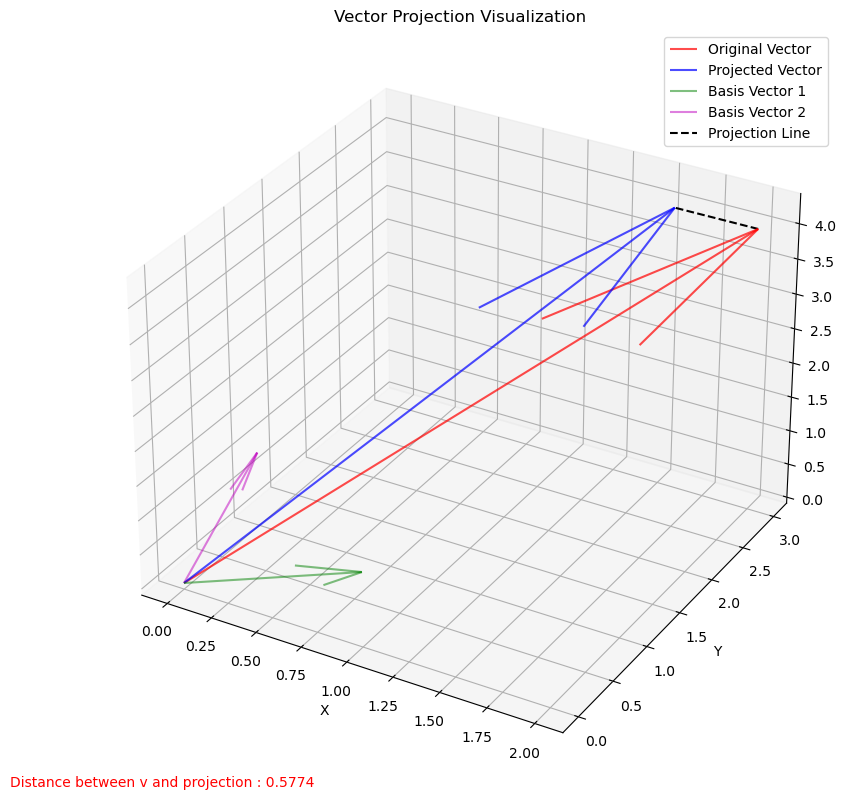

In [109]:
# Compute distance
distance = np.linalg.norm(np.array(v) - proj_v)
print("\nDistance between v and its projection : ", distance)
    
# Visualize projection
visualize_projection(basis_vectors, v)